# EXTRACTING TEXT FROM A SCREENSHOT 

and potentially feeding it to a search engine or (online) dictionary

### References:

- <a href="https://tesseract-ocr.github.io/tessdoc/Home.html">Tesseract User Manual</a>
- [Longdo Thai Dictionary](https://dict.longdo.com/search/)

In [1]:
# pip install pytesseract

from PIL import Image
from PIL import ImageGrab
import pytesseract
import requests as rq
from bs4 import BeautifulSoup as bs
from IPython.display import display
from IPython.display import HTML

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
print('>>> Likely imported.')

>>> Likely imported.


In [20]:
class ClipImg2Text:
    config_codes = """  0    Orientation and script detection (OSD) only.
      1    Automatic page segmentation with OSD.
      2    Automatic page segmentation, but no OSD, or OCR.
      3    Fully automatic page segmentation, but no OSD. (Default)
      4    Assume a single column of text of variable sizes.
      5    Assume a single uniform block of vertically aligned text.
      6    Assume a single uniform block of text.
      7    Treat the image as a single text line.
      8    Treat the image as a single word.
      9    Treat the image as a single word in a circle.
     10    Treat the image as a single character.
     11    Sparse text. Find as much text as possible in no particular order.
     12    Sparse text with OSD.
     13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific."""
    config_dict = {int(entry[0]): entry[1] for entry in [entry.strip().split('    ') for entry in config_codes.split('\n')]}
    corpus_path = r'F:\User\Learn\ไทยศึกษา\Lingvistics\lexitron_thai.txt'

    
    def __init__(self):
        self.im = None
        self.bim = None
        self.out_texts = {}
        self.validated_words = {}
        
    def grab(self):
        self.bim = None
        im = ImageGrab.grabclipboard()
        if im:
            self.im = im  # .convert("L")
        else:
            print('Looks like there was no image to grab. Please check the clipboard contents!')
        
    def binarize(self, skew=1):
        im = self.im.copy().convert("L")
        threshold = sum(im.getextrema())/2 * skew
        xs, ys = im.size
        for x in range(xs):
            for y in range(ys):
                if im.getpixel((x, y)) > threshold:
                    px = 255
                else:
                    px = 0
                im.putpixel((x, y), px)
        self.bim = im
    
    def recognize_original(self, lang='tha', config='--psm 7'):
        return pytesseract.image_to_string(self.im, config=config, lang=lang).strip() 
    
    def fan_recognize_original(self, lang='tha'):
        for code in list(self.config_dict.keys())[3:]:
            try:
                self.out_texts[code] = self.recognize_original(lang = lang, config=f'--psm {code}')
            except Exception as e:
                # texts[code] = e.__str__()
                continue
    
    def recognize_bin(self, skew=1, lang='tha', config='--psm 7'):
        self.binarize(skew)
        return pytesseract.image_to_string(self.bim, config=config, lang=lang).strip()

    def fan_recognize_bin(self, lang='tha'):
        for code in list(self.config_dict.keys())[3:]:
            for val in list(range(75,140,5)):
                key = code * 1000 + val
                self.out_texts[key] = self.recognize_bin(skew=val/100, lang=lang, config=f'--psm {code}')
                
    def validate_words(self):
        with open(self.corpus_path, encoding='utf-8') as corpus:
            words = [line.strip() for line in corpus.readlines()]
            for key, word in self.out_texts.items():
                if word in words:
                    self.validated_words[key] = word
        freqs = {}
        for word in ex.validated_words.values():
            freqs[word] = freqs.get(word, 0) + 1
        total = sum(freqs.values())
        for key, val in freqs.items():
            freqs[key] = round(val/total, 2)
        return dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True))

In [3]:
def lookup(text):
    dic_url = 'https://dict.longdo.com/search/'
    response = rq.get(dic_url + text, timeout=180)
    if not response.status_code == 200:
        print("Couldn't fetch.")
        return
    response.encoding = 'utf-8'
    soup = bs(response.text)
    headers = soup.find_all('td',  attrs={'class': 'search-table-header'})
    tables = soup.find_all('table', attrs={'class': 'search-result-table'})
    html='''<style>table {width: 60%;} </style>'''
    for header, table in zip(headers, tables):
        contents = header.text
        if not ('Subtitles' in contents or 'German-Thai:' in contents or 'French-Thai:' in contents):
            html += f'<h5>{header.text}<h5>'
            html += str(table).replace("black", "white")
    display(HTML(html))

In [21]:
ex = ClipImg2Text()

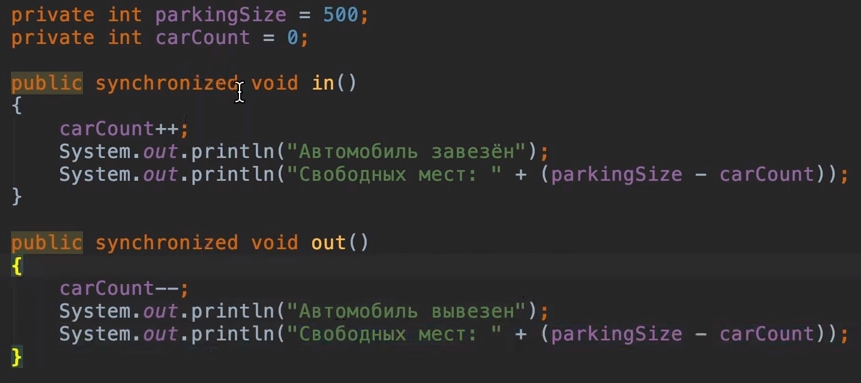

In [22]:
ex.grab()
ex.im

In [28]:
ex.out_texts = {}
psms = (3, 4, 6, 11, 12, 13)
for psm in psms:
    ex.out_texts[psm] = ex.recognize_original(lang='eng+rus', config=f'--psm {psm}')
    for skew in range(75, 140, 5):
        key = psm * 1000 + skew
        ex.out_texts[key] = ex.recognize_bin(skew/100, lang='eng+rus', config=f'--psm {psm}')

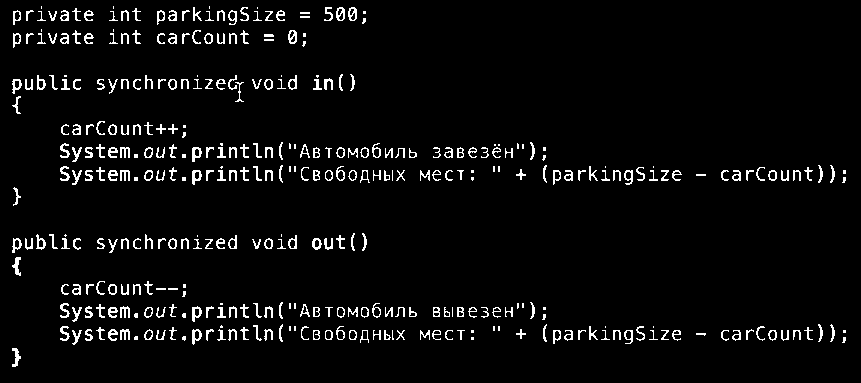

In [36]:
ex.binarize(.75)
ex.bim

In [43]:
data = list(ex.bim.getdata())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [57]:
len(ex.bim.getdata()) / sum(ex.bim.getdata())

0.08925926527430408

In [58]:
len(ex.im.getdata()) / sum(ex.im.convert('L').getdata())

0.022949265575899817

In [46]:
ex.im.entropy()

4.209224668475367

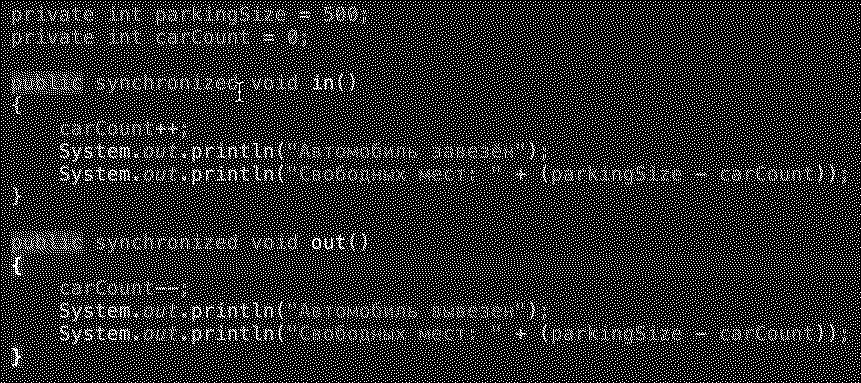

In [61]:
ex.im.convert('1')

In [35]:
for key in ex.out_texts.keys():
    text = ex.out_texts[key]
    if len(text) > 122 and 'System.out.println' in text:
        print(str(key) + ': \n')
        print(text)
        print('\n' * 3)

3075: 

private int parkingSize
private int carCount =

public synchronizecy void in()

carCount++;
Зузтет. оиЁ.рг1п1п ("Автомобиль завезён");
System. ои{.рг1п1п ("Свободных мест: " + (parkingSize - carCount));

public synchronized void out()

carCount—-;
System.out.println("AgTomo6unb вывезен");
System.out.println("Cao6oqHnx мест: " + (parkingSize - carCount));




3080: 

private int parkingSize
private int carCount =

public synchronizec, void in()

carCount++;
System.out.printin("Astomo6unb завезён");
Зузфет. сиё. рг1п1п ("Свободных мест: " + (parkingSize - carCount));

}

public synchronized void out()
4
carCount—-;
System.out.println("Astomo6uns вывезен");
Зузфет. си. рг1п1п ("Свободных мест: " + (parkingSize - carCount));




4075: 

private int parkingSize
private int carCount =

500;

public synchronizecy void in()

carCount++;
Зузтет. оиЁ.рг1п1п ("Автомобиль завезён");
System. ои{.рг1п1п ("Свободных мест: " + (parkingSize - carCount));

public synchronized void out()

carCoun

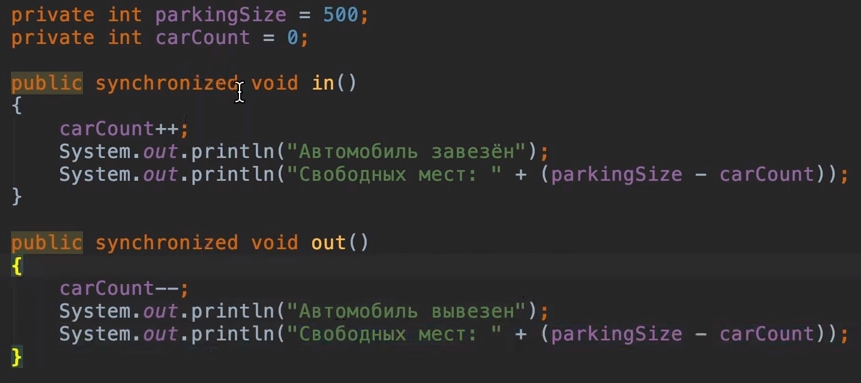

In [27]:
ex.im

In [6]:
text = ex.recognize_original(config='--psm 7')
text

'เบ็น'

In [7]:
ex.fan_recognize_original()
ex.fan_recognize_bin()
suggestions = ex.validate_words()
suggestions

{'เป็น': 0.75, 'เบน': 0.24, 'ณ': 0.02}

In [8]:
# suggestions = {'sobaka': 0.99, 'koshka': 0.77, 'enot': 0.66}

In [9]:
keys = list(suggestions.keys())
if keys:
    top = keys[0]
    print(f'The best guess is "{top}" rated {suggestions[top]}')
    print(f'Others:')
    for i in range(1, len(suggestions)):
        print(f'{i} - {keys[i]} ({suggestions[keys[i]]})', end='\t')
    word = input('Enter to proceed with top-rated suggestion or number for other:')
    if not word:
        lookup(top)
    else:
        lookup(keys[int(word)])

The best guess is "เป็น" rated 0.75
Others:
1 - เบน (0.24)	2 - ณ (0.02)	

Enter to proceed with top-rated suggestion or number for other: 


กบฎ,(n) เป็นคำที่สะกดผิด ที่ถูกต้องคือ กบฏ
กระพริบ,"เป็นคำที่มักเขียนผิด ที่ถูกต้องคือ ""กะพริบ"""
เป็นไปตาม,followed in
escargot,[เอ็สคาร์โกท์] (n) เป็นอาหารเรียกน้ำย่อย (Appetizer) โดยการนำหอยทากชนิด รับประทานได้มายัดใส่เปลือกหอยประเภทหอยโข่งขนาดมะนาว ผลเล็ก แล้วยัดตามด้วยเนยที่มีส่วนผสมของกระเทียมสับและเครื่อง เทศอื่นๆ นำอบในเตาอบความร้อนสูงบนถาดหลุมโลหะ (Convection Oven) จนสุกหอมจึงนำมารับประทานด้วยคีมหนีบ กับส้อมที่ทำขึ้นเฉพาะอาหารจานนี้
กินรา,"[กิน นะ รา] (n, stoned-word/old-fashioned/rare) เป็นสัตว์ในป่าหิมพานต์ ร่างกายท่อนบนเป็นมนุษย์ ท่อนล่างเป็นนก มีปีกบินได้เพศผู้; กินรีเพศผู้"
ตุย,[ตุย] (jargon) เป็นคำ อุทาน บ่น แสดงอาการเหนือย แปลว่า เหนื่อย เพลีย เหนื่อยมาก ประมาณว่า ไม่ไหวแล้วเหนื่อย
บังกล้อง,[บัง-กล้อง] (n) เป็นชื่อ ที่ เรียกแทน บุคคล ที่ มีคุณสมบัติ คือ กาก เกรียน เพี้ยน หลุดโลก มักชอบทำอะไร เพี้ยนๆ ไม่เหมือนคนอื่น ชอบการ fag เป็นชีวิตจิตใจ คติประจำใจ คือ สเต็ปอยู่ในไต
in keeping with,เป็นไปตาม สอดคล้องกับ เช่น to act in keeping with the codes of ethics
petechiae (1-2 mm),"(n) เป็นจุดเลือดออกขนาดเล็กในชั้นผิวหนังหรือเยื่อบุ สาเหตุเนื่องจากมีความผิดปกติของผนังหลอดเลือด หรือความผิดปกติของระบบแข็งตัวของเลือด ถ้า purpura ขนาดใหญ่มากกว่า 1 เซนติเมตรและหรือเกิดจากการกระแทกอาจเรียกอีกชื่อหนึ่งว่า ecchymosis, See also: S. purpura2-10 mm, ecchymosis"
พันพรือ,เป็นอะไร
เป็น,"(v) be, See also: is, am, are, become, Syn. คือ, เป็น, เป็นอยู่, Thai Definition: คำกริยาสำหรับแสดงความสัมพันธ์ระหว่างคำกับคำเพื่อให้เห็นว่าคำหน้าและคำหลังมีภาวะ คือความมี ความเป็นเกี่ยวข้องกันอย่างไร"


In [10]:
lookup('หมา')

กฎหมายที่ประชาชนควรรู้,Public Law
วิชากฎหมายธุรกิจ,"(n, phrase) Business Law"
สำนักหอจดหมายเหตุแห่งชาติ,(n) National Achives of Thailand
หมายคดีถึงที่สุด,Writ of Absolute Execution
หมากผู,(n) มะปรางหวาน
หมา,"(n) dog, See also: canine, hound, Syn. สุนัข, Example: เสียงเห่าของหมายามค่ำคืนเป็นสิ่งที่สมบุญจะต้องพึ่งพาอาศัยอยู่เสมอ, Count Unit: ตัว, Thai Definition: ชื่อสัตว์เลี้ยงลูกด้วยนม ลำตัวมีขนปกคลุม มีเขี้ยว 2 คู่ ตีนหน้ามี 5 นิ้ว ตีนหลังมี 4 นิ้ว ซ่อนเล็บไม่ได้"
หมาง,"(v) be at odds with, See also: be on bad terms, Syn. หมองใจ, ผิดใจ, หมองหมางใจ, Example: สามีภรรยาเกิดหมางกันขึ้นเพราะความไม่ไว้วางใจซึ่งกันและกัน"
หมาด,"(v) half dry, See also: almost dry, Example: พอผมหมาด คุณแม่ก็ใช้ที่เป่าผมเป่าให้แห้ง, Thai Definition: แห้งไม่สนิท, เกือบแห้ง"
หมาย,"(n) warrant, Syn. ใบแจ้ง, หมายเรียก, ใบประกาศ, Example: ศาลมีหมายมาถึงเขา เพื่อให้เขามาเป็นพยานในการพิพากษาตัดสินคดีนี้, Count Unit: ฉบับ, Thai Definition: หนังสือคำสั่งของศาล หรือเจ้าพนักงาน สั่งให้กระทำการ หรือห้ามกระทำการอย่างใดอย่างหนึ่ง, Notes: (กฎหมาย)"
หมาย,"(v) aim, See also: intend, expect, Syn. มุ่ง, มุ่งหมาย, ตั้งใจ, หมายมั่น, หมายใจ, มั่นหมาย, Example: เขาหมายว่า การแข่งขันในครั้งนี้เขาจะต้องชนะ"
หมาดๆ,"(adj) damp, See also: dank, moist, Example: หากเลือกกำเดาไหล ให้ใช้ผ้าหมาดๆ ชุบยาหยอดจมูก, Thai Definition: เกือบแห้ง, แห้งไม่สนิท"
